## Empirical CDF Convergence & Bootstrapping

#### *16 October 2019*
#### *DATA 1010*

In [1]:
using StatsBase, Distributions, Plots, Roots, LaTeXStrings, Random

The **Glivenko-Cantelli theorem** states that the empirical CDF estimated from $n$ observations from a distribution approaches the true CDF of the distribution as $n \to \infty$, i.e.

$$ \max_{x} |F(x)-\hat{F}_n(x)| \to 0 \quad \text{as} \quad n \to \infty$$

## Problem 1

For various values of $n$ between $10^2$ and $10^5$, generate $n$ observations from $\mathcal{N}(\mu=1,\sigma=3)$. Compute the empirical CDF, $\hat{\Phi}$, and compare with the true CDF, $\Phi$:

$$ \hat{\Phi}(x) = \frac{1}{n} \sum_{i=1}^n \mathbb{1}_{\{X_i<x\}} \quad \text{where} \quad \{X_i\}_{i=1}^n \quad \text{are the $n$ samples}$$

$$ \Phi(x) = \int_{-\infty}^{x} \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

Do the results match your expectations?

In [2]:
sample_sizes = [floor(Int, 10^k) for k in range(2, 5, length=100)]
sorted_samples = [sort(rand(Normal(1, 3), n)) for n in sample_sizes];
# TODO: plot Φ̂ and Φ

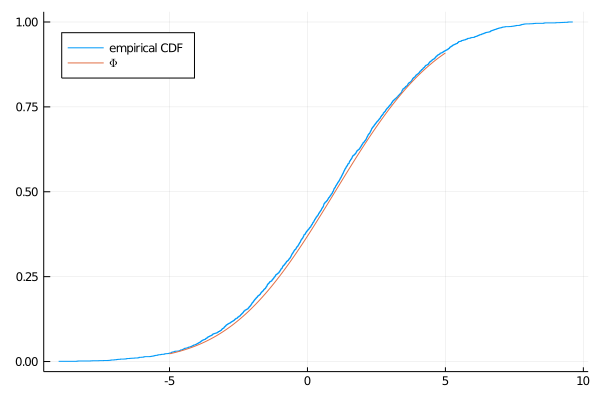

In [3]:
mysample = sorted_samples[50]
n = length(mysample)
plot(mysample, (1:n)/n, seriestype = :steppre, label = "empirical CDF", legend = :topleft)
plot!(-5:0.1:5, x-> cdf(Normal(1,3),x), label = L"\Phi")

## Problem 2

Repeat the preceding exercise, but with the distribution whose CDF is the following function $F$:

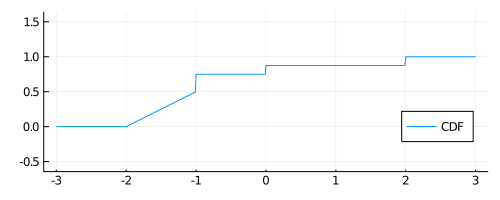

In [4]:
function F(x)
    if x < -2
        0
    elseif x < -1
        (x + 2)/2
    elseif x < 0
        3/4
    elseif x < 2
        7/8
    else
        1
    end
end

plot(-3:0.01:3, F, ratio = 1, label = "CDF", legend = :bottomright, size = (500,200))

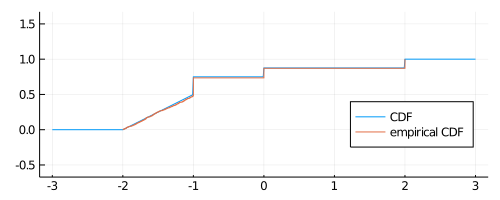

In [5]:
function F⁻¹(u)
    if u < 1/2
        2u - 2
    elseif u < 3/4
        -1
    elseif u < 7/8
        0
    else
        2
    end
end

n = 1000
plot!(sort([F⁻¹(rand()) for _ in 1:n]), (1:n)/n, seriestype = :steppre,
      label = "empirical CDF", legend = :bottomright)

---

The previous result can be made more precise. For any arbitrary value $\epsilon > 0$, the **Dvoretzky-Kiefer-Wolfowitz (DKW) inequality** provides a (probabilistic) upper bound for the error in the CDF estimate:

$$ \mathbb{P}\Big( \max_{x} |F(x)-\hat{F}_n(x)| \le \epsilon \Big) \ge 1 - 2e^{-2n\epsilon^2} $$

Setting $\alpha = 2e^{-2n\epsilon^2}$, we can draw a confidence band around $F(x)$ with width $\epsilon_n = \sqrt{\frac{1}{2n}\log(2/\alpha)}$. The empirical CDF obtained from the samples will lie within the confidence band with probability at least $1 - \alpha$. By symmetry, $F(x)$ lies in the $\epsilon_n$-confidence band around the empirical CDF as well.

## Problem 3

Draw $n = 100$ observations from $\mathcal{N}(1, 3)$. Plot the empirical CDF of the distribution. Draw a $95\%$ confidence band around the empirical CDF.

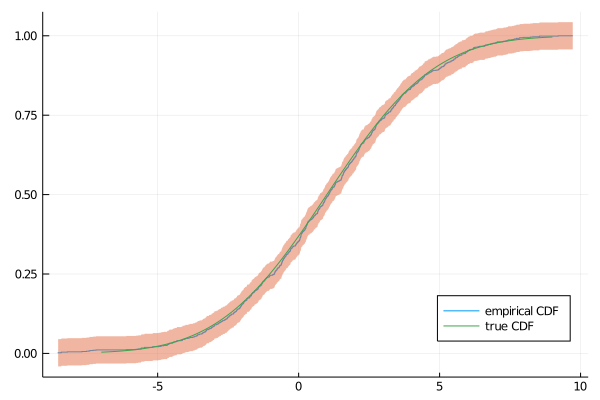

In [6]:

using Distributions, Plots

n = 1000
observations = sort(rand(Normal(1, 3), n));

ϵ = find_zero(ϵ -> 2exp(-2n*ϵ^2) - 0.05, 0.01)

plot(observations, (1:n)/n, seriestype = :steppre, label = "empirical CDF")
plot!(observations, (1:n)/n .+ ϵ, fillrange = (1:n)/n .- ϵ, fillopacity = 0.5, linewidth = 0, seriestype = :steppre, label = "")
xs = -7:0.1:9
plot!(xs, x-> cdf(Normal(1,3), x), label = "true CDF", legend = :bottomright)

---

## Bootstrapping

Next, we introduce a general methodology to approximate a plug-in estimator, in situations where it is difficult to calculate the value of the plug-in estimator directly. 

## Problem 4

Assume that the following observations are drawn from an Exponential distribution with parameter $\lambda$. Define the statistical functional $T(\nu) = 1/\mathbb{E}[\nu]$. Find the value of the plug-in estimator of $T$ for the sample given below.

In [7]:

using Statistics, StatsBase
data = [11.96, 5.03, 67.40, 16.07, 31.50, 7.73, 11.10, 22.38];

1/mean(data)

0.046197378298781545

Note that the standard error of this plug-in estimator **is itself a statistical functional**: it's the square root of the variance of 8 independent observations from the underlying distribution $\nu$. We can approximate this standard error using *its* plug-in estimator. In other words, we draw 8 independent observations from the *empirical* measure and calculate the variance of that random variable. However, unlike the mean, this statistical functional is not easy to evaluate directly. So instead, we simulate this random variable many times and take an average. 

## Problem 5

Use bootstrapping to estimate the standard error of the plug-in estimator of $\lambda$. 

In [8]:
boot_estimates = [1/mean(sample(data, length(data))) for _ in 1:10^5]
std(boot_estimates)

0.016962139056382483

The quantiles of an estimator are also statistical functional. Abstractly: we draw $n$ observations from the distribution $\nu$, combine them to obtain the value of the estimator (note that the estimator is a random variable), and extract a quantile of the distribution of the estimator's distribution. We can use bootstrap approximation for these functionals as well.

## Problem 6

Find the bootstrap approximation for the 5% and 95% quantiles of the estimator λ̂. 

Note: you can find quantiles of an empirical CDF using the function `quantile`. 

In [9]:
quantile(boot_estimates, (0.05, 0.95))

(0.029446407538280327, 0.08378718056137409)

## Problem 7

(a) Consider 20 independent random variables $X_1, \ldots, X_{20}$ which are each uniformly distributed on $[0,1]$. Find the exact value of the standard error of the sample mean $(X_1 + X_2 + \cdots + X_{20})/20$. 

(b) Draw 20 observations from $\mathrm{Unif}([0,1])$ and approximate the standard error of the sample mean of 20 draws from the discrete distribution which places mass $1/n$ at each of those 20 observations.

Hint: you can use the function `sample` to draw independent observations from a collection.

*Solution*. 

In [10]:
Random.seed!(123)
observations = rand(20)

20-element Array{Float64,1}:
 0.7684476751965699
 0.940515000715187
 0.6739586945680673
 0.3954531123351086
 0.3132439558075186
 0.6625548164736534
 0.5860221243068029
 0.05213316316865657
 0.26863956854495097
 0.10887074134844155
 0.16366581948600145
 0.4730168160953825
 0.8654121434083455
 0.617491887982287
 0.2856979003853177
 0.46384720826189474
 0.2758191151428051
 0.44656806533266313
 0.5823177800870469
 0.2559813032181608

In [11]:
actual_std_error = sqrt(1/240)

0.06454972243679027

In [12]:
std(mean(sample(observations, 20)) for _ in 1:10^6)

0.05431637273870179

---

Note that bootstrapping only allows us to approximate $T(\hat{\nu})$ (the plug-in estimator of a statistical functional $T$), and there are instances where $T(\hat{\nu})$ is not close to $T(\nu)$. Let's look at a classical example where bootstrapping does not yield satisfactory results.

## Problem 8 (Challenge)

Assume we have $n$ observations, $X_1,\cdots,X_n$ from $\nu = \operatorname{Unif}[0, \theta]$. Note that $\theta = T(\nu)$, where $T$ is the maximum functional. 

(a) What is the plug-in estimator for $T$? What the CDF of the estimator, $F_{\hat{\theta}_n}(x) = \mathbb{P}(\hat{\theta}_n \le x)$?

(b) Show that $\mathbb{P}(n(\theta - \hat{\theta}_n) \le x)$ converges to an exponential distribution as $n\to\infty$.

(c) For $\theta = 2$, draw $n=25$ observations from the uniform distribution. Then compute $\hat{\theta}_n$ using $5000$ bootstrap samples and plot a histogram of estimated values. Show that $\mathbb{P}(n(\theta - \hat{\theta}_n) \le x)$ fails to converge to an exponential function.

(d) To resolve the issue, we generate *parametric* bootstrap samples. Compute $\hat{\theta}$ from the $25$ observations, then generate $5000$ bootstrap samples by sampling from $\operatorname{Unif}[0, \hat{\theta}]$. Plot a histogram of the estimates, $\hat{\theta}_n$, and show that $\mathbb{P}(n(\theta - \hat{\theta}_n) \le x)$ converges (in distribution) to the exponential function.

(e) Show that bootstrapping fails to give accurate values for functionals $T_2$ which are based on the empirical CDF of $\hat{\theta}_n$. (For example, consider the median of $\hat{\theta}_n$.) 

---

## Problem 9 (Challenge)

Consider i.i.d. random variables $X_1, \ldots, X_n$ with CDF $F$, and let $\hat{F}_n$ be the associated empirical CDF. Prove that for each $x$, the estimator $\hat{F}_n(x)$ of $F(x)$ is unbiased with variance $\frac{1}{n}F(x)(1-F(x))$. 


**Hint:** Let $Y = \hat{F}_n(x) = \frac{1}{n}\sum_{i=1}^{n} \mathbb{1}_{\{X_i \le x\}}$. 

Calculate $\mathbb{E}[Y]$ and $\mathbb{E}[Y^2]$. Recall that: $\mathbb{E}[\mathbb{1}_{A}] = \mathbb{P}(A)$ for event $A$.

---

## Problem 10 (Challenge)

Suppose you have $n$ distinct observations: $X_1,\cdots,X_n$. Prove that the number of distinct bootstrap samples that can be generated is ${2n-1 \choose n}$.


**Hint:** Assume that $X_i$ is chosen $k_i$ times for integers $k_i \ge 0$.

Then $\sum_{i=1}^n k_i = n$. Show that the number of possible values for such integers is equal to coefficient of $x^n$ in the expression: $(1+x+x^2+\cdots)^n$